# t-distributed Stochastic Neighbor Embedding

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

In [3]:
X = pd.read_csv('./../../../data_source/to_analysis/complete_decorr.csv', index_col=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Sphericity,CT original_firstorder_10Percentile,CT original_firstorder_90Percentile,CT original_firstorder_Energy,CT original_firstorder_Entropy,CT original_firstorder_InterquartileRange,...,Cisplatin_2,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4,forward_corr
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,0.661532,0.097696,0.221526,568.990940,0.183969,0.056668,...,0,0,0,0,1,0,0,0,1,1.306738
4,0.796900,0.629917,19.845151,31.504408,0.701721,-0.315120,0.171638,526.512287,0.990405,0.182336,...,0,0,0,1,0,0,0,0,1,1.164781
5,0.600926,0.535140,22.515072,42.073251,0.762365,-0.084255,0.278018,815.922259,0.627742,0.110940,...,0,0,0,0,0,0,1,0,0,0.666036
8,0.784571,0.414247,30.263897,73.057649,0.520001,0.022160,0.187135,3844.580668,0.415386,0.064696,...,0,1,0,0,0,0,0,0,1,1.365648
10,0.690320,0.539743,19.449801,36.035312,0.643822,-0.180616,-0.068998,428.168548,0.063316,0.044584,...,0,0,0,0,1,0,0,0,1,4.761471


standard: 0.068 sec
standard: 0.057 sec
standard: 0.096 sec


/Users/severinlangberg/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/severinlangberg/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


standard: 0.12 sec
ISO: 0.033 sec
MDS: 0.1 sec
Spectral Embedding: 0.024 sec

/Users/severinlangberg/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "



t-SNE: 1.4 sec


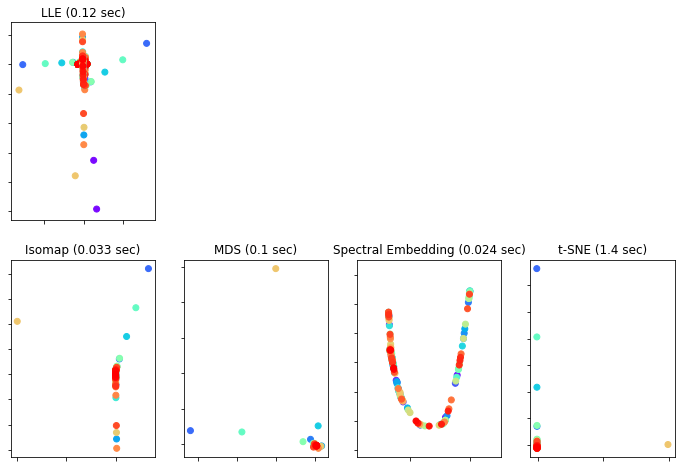

In [21]:
Axes3D
fig = plt.figure(figsize=(15, 8))

# Perform Locally Linear Embedding Manifold learning
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

colors = np.arange(198)

n_neighbors = 10
for num, method in enumerate(methods):
    t0 = time()
    model = manifold.LocallyLinearEmbedding(n_neighbors, 2, method=method)
    trans_data = model.fit_transform(X).T
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    
    ax1 = fig.add_subplot(252 + i)
    plt.scatter(trans_data [0], trans_data [1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax1.xaxis.set_major_formatter(NullFormatter())
    ax1.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(sphere_data).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ax2 = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax3 = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax4 = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax4.xaxis.set_major_formatter(NullFormatter())
ax4.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax5 = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax5.xaxis.set_major_formatter(NullFormatter())
ax5.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()